In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
import seaborn as sb

In [2]:
df=pd.read_csv("height-weight.csv")
print(df)

    Weight  Height
0       45     120
1       58     135
2       48     123
3       60     145
4       70     160
5       78     162
6       80     163
7       90     175
8       95     182
9       78     170
10      82     176
11      95     182
12     105     175
13     100     183
14      85     170
15      78     177
16      50     140
17      65     159
18      76     150
19      87     167
20      45     129
21      56     140
22      72     160


Text(0.5, 1.0, 'W vs H')

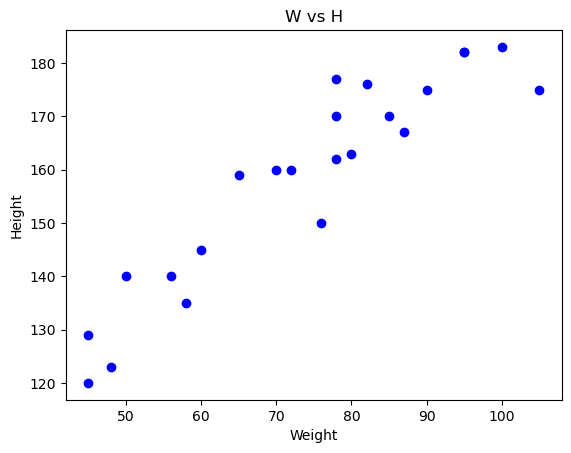

In [3]:
#scatter plot data 
plt.scatter(df['Weight'],df['Height'],color='blue')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("W vs H")

In [5]:
#corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


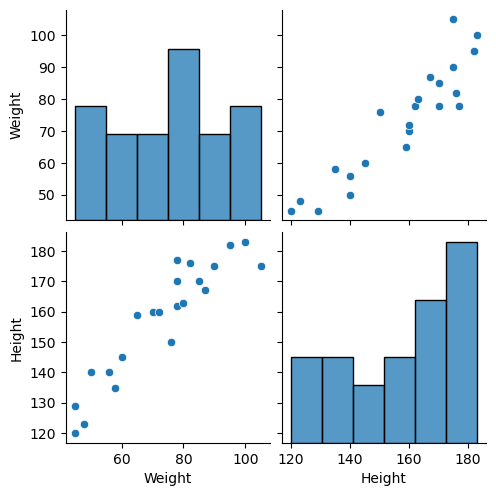

In [6]:
## seaborn
sb.pairplot(df)

In [7]:
#independent and dependent features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
x=df['Weight']
x
print(type(x))#-> series
x=df[['Weight']]
print(type(x))#-> dataframe

#independent features should be data frame or 2d array


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
x=df['Weight']
np.array(x).shape
#here no column info in y

(23,)

In [12]:
x=df[['Weight']]
np.array(x).shape
#here column info in y

(23, 1)

In [ ]:
#dependent feature should be a series or 1d array
y=df['Height']
np.array(y).shape

(23,)

In [18]:
#train test split : for over fitting and underfittig 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=42)

In [15]:
x_train

,Weight
7,90
10,82
14,85
19,87
6,80


In [20]:
x_train.shape

(5, 1)

In [16]:
y_train

7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [21]:
y_train.shape

(5,)

In [17]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105
1,58
13,100
5,78
2,48


In [22]:
x_test.shape

(18, 1)

In [19]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
Name: Height, dtype: int64

In [23]:
y_test.shape

(18,)

In [24]:
#standardization (meu=0,sigma=1)

from sklearn.preprocessing import StandardScaler


In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
print(x_train)
print("\n\n")
x_test=scaler.transform(x_test)
print(x_test)

[[ 1.46726488]
 [-0.79006571]
 [ 0.05643326]
 [ 0.62076591]
 [-1.35439836]]



[[ -1.918731  ]
 [ -1.918731  ]
 [-11.23021969]
 [  2.8780965 ]
 [ -5.58689322]
 [  5.69975974]
 [ -7.56205748]
 [  4.28892812]
 [ -1.918731  ]
 [-10.38372072]
 [  2.8780965 ]
 [-11.23021969]
 [ -6.99772483]
 [ -4.1760616 ]
 [ -2.48306365]
 [ -9.81938807]
 [ -8.12639013]
 [ -3.61172895]]


In [29]:
#apply simple linear regression

from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression(n_jobs=-1)

In [31]:
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
lr

LinearRegression(n_jobs=-1)

In [ ]:
lr.coef_
#yaha slope mila h

array([2.04288419])

In [35]:
lr.intercept_
#yaha intercept milega

170.2

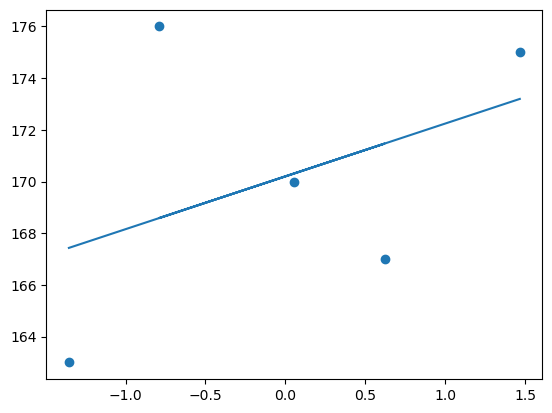

In [38]:
#plotting best fir line from training data
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train))

Prediction for test data

1.predicted height output= intercept + coef_ (weights)

2. y_pred_test=65.4364+ 1.26 (x_test)

In [41]:
#prediction for test data
y_pred=lr.predict(x_train)
print(y_pred)

[173.19745223 168.58598726 170.31528662 171.46815287 167.43312102]


In [49]:
#Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error


In [48]:
temp=y_test.head(5)
temp

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [51]:
mae=mean_absolute_error(temp,y_pred)
print(mae)
mse=mean_squared_error(temp,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

14.899363057324837
546.0248407643312
23.367174428337098


R square
R^2=1-SSR/SST
R^2=coefficient of determination SSR=sum of square residuals SST=total_sum of sqares

In [52]:
from sklearn.metrics import r2_score
score=r2_score(temp,y_pred)
print(score)

-0.10926548180629614


Adjusted R2=[(1-R2)*(n-1)/(n-k-1)]
R2: R2 of the model
n: no of observations
k: no of predictor variables


In [53]:
# display adjusted r2

R2=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(R2)

-0.1785945744191897


In [54]:
#OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [56]:
prediction=model.predict(x_test)
print(prediction)

[ -3.91974522  -3.91974522 -22.94203822   5.87961783 -11.4133758
  11.64394904 -15.44840764   8.76178344  -3.91974522 -21.21273885
   5.87961783 -22.94203822 -14.2955414   -8.53121019  -5.07261146
 -20.05987261 -16.60127389  -7.37834395]


In [57]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.250
Method:                 Least Squares   F-statistic:                          0.0005759
Date:                Mon, 16 Jun 2025   Prob (F-statistic):                       0.982
Time:                        15:59:24   Log-Likelihood:                         -32.781
No. Observations:                   5   AIC:                                      67.56
Df Residuals:                       4   BIC:                                      67.17
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\RITIK KUMAR\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
#prdiction for new data
lr.predict([[56]])  ##(weight)

array([284.6015144])

In [60]:
lr.predict(scaler.transform([[56]]))

array([284.6015144])